In [79]:
pip install matplotlib

  Using cached matplotlib-3.10.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.8 kB)
Using cached matplotlib-3.10.8-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp312-cp312-macosx_10_13_universal2.whl (2.9 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-12.0.0-cp312-cp312-macosx_11_0_arm64.whl (4.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need 

In [119]:
pip install geopy pandas tqdm

Note: you may need to restart the kernel to use updated packages.


In [110]:
pip install folium

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached markupsafe-3.0.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.7 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached markupsafe-3.0.3-cp312-cp312-macosx_11_0_arm64.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [folium]
Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster
from branca.colormap import linear, StepColormap

In [2]:
df = pd.read_csv("data/poi_type_checkin_crime.csv")

In [3]:
df.head()

,user_id,utc_time,latitude,longitude,poi_id,poi_name,poi_type,poi_category,local_time,DECEPTIVE PRACTICE,...,GAMBLING,KIDNAPPING,INTIMIDATION,STALKING,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,NON-CRIMINAL,CRIMINAL SEXUAL ASSAULT,HOMICIDE
0,17,2010-09-06T00:38:52Z,41.878700,-87.639656,0,Car Rentals,car_rental,amenity,2010-09-05 19:38:52-05:00,9,...,0,0,0,0,1,0,0,0,0,0
1,17,2010-09-05T00:58:36Z,41.920592,-87.637466,1,Riccardo Trattoria,restaurant,amenity,2010-09-04 19:58:36-05:00,3,...,0,0,0,0,0,0,0,0,0,0
2,17,2010-09-01T23:29:34Z,41.872821,-87.627609,2,South State Street,secondary,highway,2010-09-01 18:29:34-05:00,9,...,0,0,0,0,0,0,0,0,0,0
3,17,2010-09-01T17:25:27Z,41.865485,-87.616997,3,Field Museum,museum,tourism,2010-09-01 12:25:27-05:00,5,...,0,0,0,0,0,0,0,0,0,0
4,17,2010-08-29T22:20:38Z,41.893874,-87.634483,4,"640, North Wells Street, River North, Near Nor...",apartments,building,2010-08-29 17:20:38-05:00,13,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64453 entries, 0 to 64452
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           64453 non-null  int64  
 1   utc_time                          64453 non-null  object 
 2   latitude                          64453 non-null  float64
 3   longitude                         64453 non-null  float64
 4   poi_id                            64453 non-null  int64  
 5   poi_name                          64453 non-null  object 
 6   poi_type                          64453 non-null  object 
 7   poi_category                      64453 non-null  object 
 8   local_time                        64453 non-null  object 
 9   DECEPTIVE PRACTICE                64453 non-null  int64  
 10  OFFENSE INVOLVING CHILDREN        64453 non-null  int64  
 11  NARCOTICS                         64453 non-null  int64  
 12  THEF

In [5]:
df["utc_time"].min(), df["utc_time"].max()

('2009-04-10T01:40:32Z', '2010-10-22T21:12:05Z')

In [6]:
df.describe()

,user_id,latitude,longitude,poi_id,DECEPTIVE PRACTICE,OFFENSE INVOLVING CHILDREN,NARCOTICS,THEFT,CRIM SEXUAL ASSAULT,BATTERY,...,GAMBLING,KIDNAPPING,INTIMIDATION,STALKING,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,NON-CRIMINAL,CRIMINAL SEXUAL ASSAULT,HOMICIDE
count,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,...,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000
mean,47820.744853,41.903500,-87.694856,2637.162863,7.705879,0.102090,3.186586,42.087118,0.224163,8.643321,...,0.021302,0.010411,0.067413,0.040603,0.005477,0.009573,0.010566,0.000341,0.002839,0.010892
std,50767.510918,0.061377,0.095898,2497.111576,9.297165,0.349087,3.802052,46.228420,0.517360,8.088159,...,0.161821,0.102111,0.304553,0.202952,0.073803,0.097372,0.102247,0.018472,0.056050,0.107466
min,17.000000,41.645422,-87.940096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4923.000000,41.881522,-87.720535,437.000000,1.000000,0.000000,0.000000,10.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27310.000000,41.896150,-87.651195,1948.000000,4.000000,0.000000,2.000000,23.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,88475.000000,41.947921,-87.628891,4223.000000,12.000000,0.000000,5.000000,57.000000,0.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,196281.000000,42.022844,-87.525150,9288.000000,53.000000,6.000000,85.000000,207.000000,4.000000,58.000000,...,8.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000


In [7]:
df["poi_category"].value_counts(normalize=True).mul(100).round(1)

poi_category
amenity       42.4
building      20.2
highway        8.9
shop           8.6
leisure        4.0
tourism        3.3
place          3.3
man_made       2.6
aeroway        2.4
railway        1.6
office         1.5
historic       0.5
emergency      0.3
craft          0.2
military       0.1
healthcare     0.1
club           0.0
boundary       0.0
Name: proportion, dtype: float64

In [8]:
df["poi_type"].value_counts().head(20)

poi_type
yes                 6957
restaurant          4685
parking             3549
ticket_validator    3327
apartments          2462
fast_food           2331
house               2278
bar                 2181
toilets             1818
cafe                1681
bridge              1602
gate                1462
elevator            1076
clothes             1053
bus_stop            1014
retail               977
office               961
hotel                938
pitch                790
secondary            784
Name: count, dtype: int64

In [9]:
print(df.columns)

Index(['user_id', 'utc_time', 'latitude', 'longitude', 'poi_id', 'poi_name',
       'poi_type', 'poi_category', 'local_time', 'DECEPTIVE PRACTICE',
       'OFFENSE INVOLVING CHILDREN', 'NARCOTICS', 'THEFT',
       'CRIM SEXUAL ASSAULT', 'BATTERY', 'SEX OFFENSE', 'ASSAULT', 'BURGLARY',
       'ROBBERY', 'WEAPONS VIOLATION', 'PROSTITUTION', 'CRIMINAL TRESPASS',
       'CRIMINAL DAMAGE', 'ARSON', 'MOTOR VEHICLE THEFT', 'OTHER OFFENSE',
       'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING', 'KIDNAPPING',
       'INTIMIDATION', 'STALKING', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'NON-CRIMINAL', 'CRIMINAL SEXUAL ASSAULT',
       'HOMICIDE'],
      dtype='object')


In [10]:
crime_cols = [
    'DECEPTIVE PRACTICE',
       'OFFENSE INVOLVING CHILDREN', 'NARCOTICS', 'THEFT',
       'CRIM SEXUAL ASSAULT', 'BATTERY', 'SEX OFFENSE', 'ASSAULT', 'BURGLARY',
       'ROBBERY', 'WEAPONS VIOLATION', 'PROSTITUTION', 'CRIMINAL TRESPASS',
       'CRIMINAL DAMAGE', 'ARSON', 'MOTOR VEHICLE THEFT', 'OTHER OFFENSE',
       'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING', 'KIDNAPPING',
       'INTIMIDATION', 'STALKING', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'NON-CRIMINAL', 'CRIMINAL SEXUAL ASSAULT',
       'HOMICIDE'
]

df[crime_cols].describe()

,DECEPTIVE PRACTICE,OFFENSE INVOLVING CHILDREN,NARCOTICS,THEFT,CRIM SEXUAL ASSAULT,BATTERY,SEX OFFENSE,ASSAULT,BURGLARY,ROBBERY,...,GAMBLING,KIDNAPPING,INTIMIDATION,STALKING,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,NON-CRIMINAL,CRIMINAL SEXUAL ASSAULT,HOMICIDE
count,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,...,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000
mean,7.705879,0.102090,3.186586,42.087118,0.224163,8.643321,0.239167,2.963617,2.331047,2.604968,...,0.021302,0.010411,0.067413,0.040603,0.005477,0.009573,0.010566,0.000341,0.002839,0.010892
std,9.297165,0.349087,3.802052,46.228420,0.517360,8.088159,0.533875,3.266898,2.651210,3.145530,...,0.161821,0.102111,0.304553,0.202952,0.073803,0.097372,0.102247,0.018472,0.056050,0.107466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,2.000000,23.000000,0.000000,6.000000,0.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,5.000000,57.000000,0.000000,13.000000,0.000000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,53.000000,6.000000,85.000000,207.000000,4.000000,58.000000,6.000000,23.000000,21.000000,26.000000,...,8.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000


### User safety behaviour

calculating total crimes per checkin

In [11]:
df["total_crime"] = df[crime_cols].sum(axis=1)
df["total_crime"].describe()

count    64453.000000
mean        88.814376
std         78.469816
min          0.000000
25%         30.000000
50%         64.000000
75%        128.000000
max        370.000000
Name: total_crime, dtype: float64

**safety level of checking by user**

Mean

In [12]:
df.groupby("user_id")["total_crime"].mean().describe()

count    4378.000000
mean       80.018321
std        54.645740
min         0.000000
25%        42.333333
50%        67.500000
75%       111.138393
max       322.000000
Name: total_crime, dtype: float64

Median

In [13]:
df.groupby("user_id")["total_crime"].median().value_counts() 

total_crime
0.0      173
55.0      65
52.0      62
56.0      56
49.0      52
        ... 
243.0      1
245.5      1
195.5      1
196.5      1
177.5      1
Name: count, Length: 489, dtype: int64

### Safety poi context

Average safety context of POIs

In [14]:
poi_context = (
    df
    .groupby(["poi_id", "poi_category", "poi_type"])["total_crime"]
    .mean()
    .reset_index()
)

In [15]:
poi_context

,poi_id,poi_category,poi_type,total_crime
0,0,amenity,car_rental,100.981723
1,1,amenity,restaurant,43.700000
2,2,highway,secondary,104.000000
3,3,tourism,museum,16.000000
4,4,building,apartments,143.333333
...,...,...,...,...
9284,9284,building,yes,61.000000
9285,9285,shop,hairdresser,36.000000
9286,9286,highway,tertiary,0.000000
9287,9287,amenity,fast_food,103.000000


crimes by poi category

In [16]:
crime_by_category = poi_context.groupby("poi_category")["total_crime"].mean().sort_values(ascending=False)

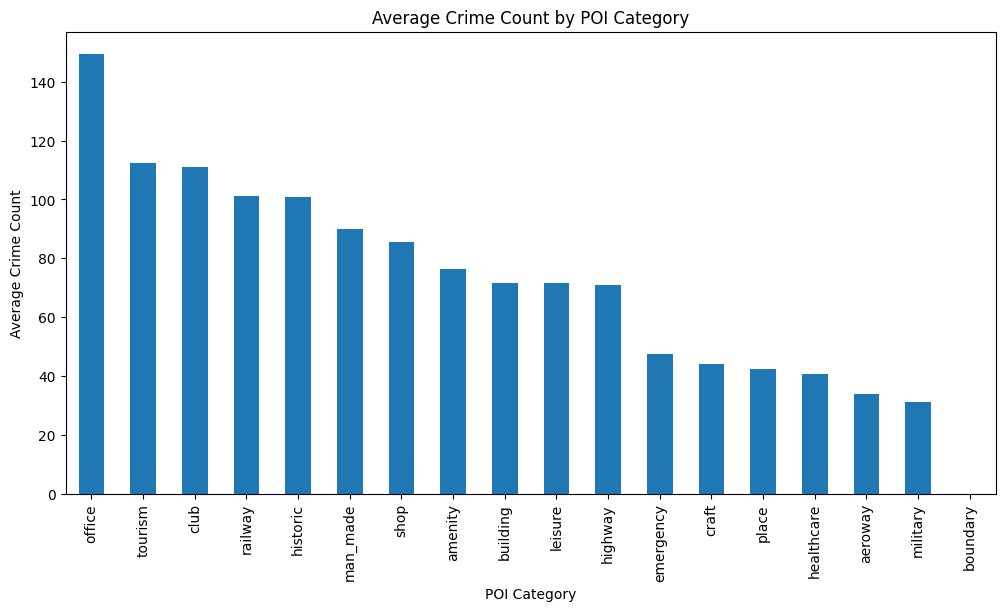

In [17]:
crime_by_category.plot(kind="bar", figsize=(12,6), title="Average Crime Count by POI Category")
plt.ylabel("Average Crime Count")
plt.xlabel("POI Category")
plt.show()

crimes by poi type

In [18]:
crime_by_type = poi_context.groupby("poi_type")["total_crime"].mean().sort_values(ascending=False)

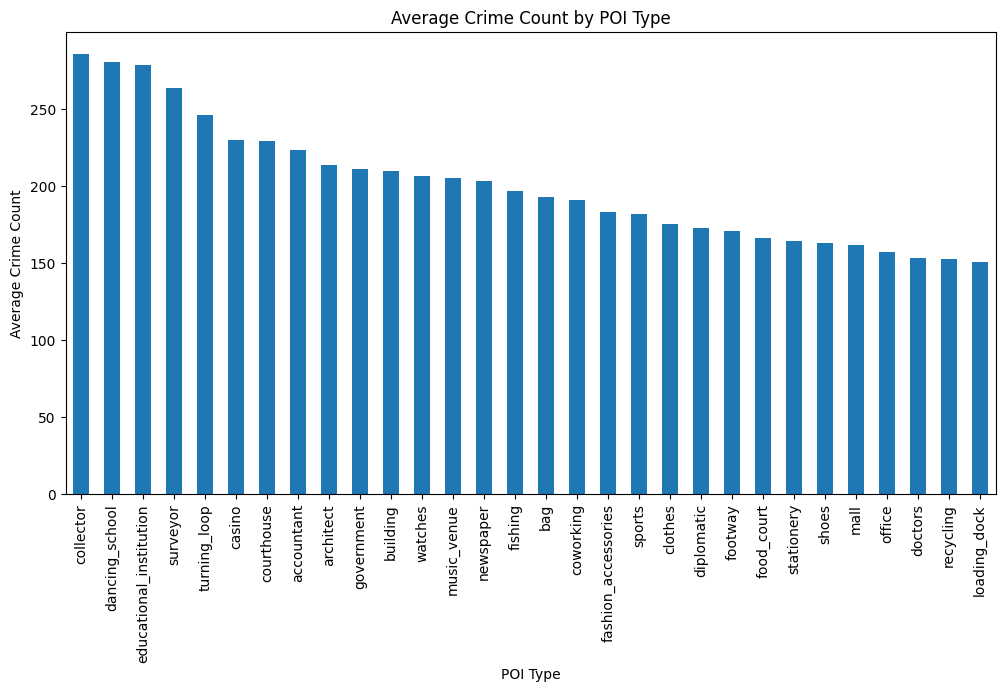

In [19]:
crime_by_type.head(30).plot(kind="bar", figsize=(12,6), title="Average Crime Count by POI Type")
plt.ylabel("Average Crime Count")
plt.xlabel("POI Type")
plt.show()

crimes by amenity type

In [20]:
amenity_context = poi_context[poi_context["poi_category"] == "amenity"]

In [21]:
crime_by_amenity_type = amenity_context.groupby("poi_type")["total_crime"].mean().sort_values(ascending=False)

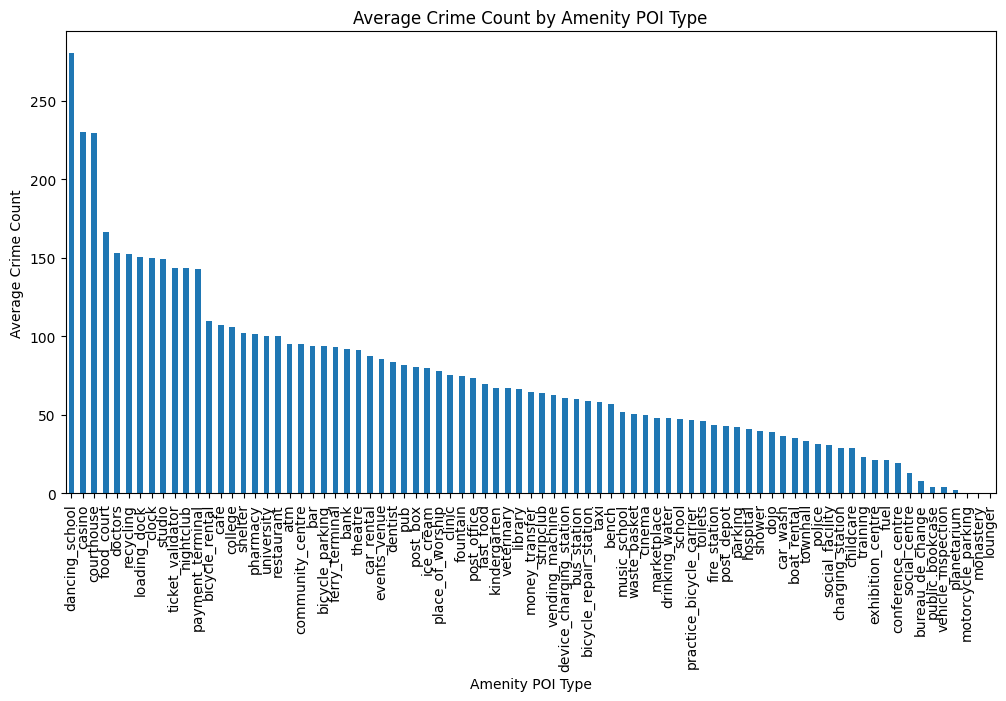

In [22]:
crime_by_amenity_type.plot(kind="bar", figsize=(12,6), title="Average Crime Count by Amenity POI Type")
plt.ylabel("Average Crime Count")
plt.xlabel("Amenity POI Type")
plt.show()

In [23]:
crime_by_amenity_type_full = (
    amenity_context
    .groupby("poi_type")
    .agg(
        mean_total_crime=("total_crime", "mean"),
        n_pois=("poi_id", "nunique")
    )
    .sort_values("mean_total_crime", ascending=False)
)

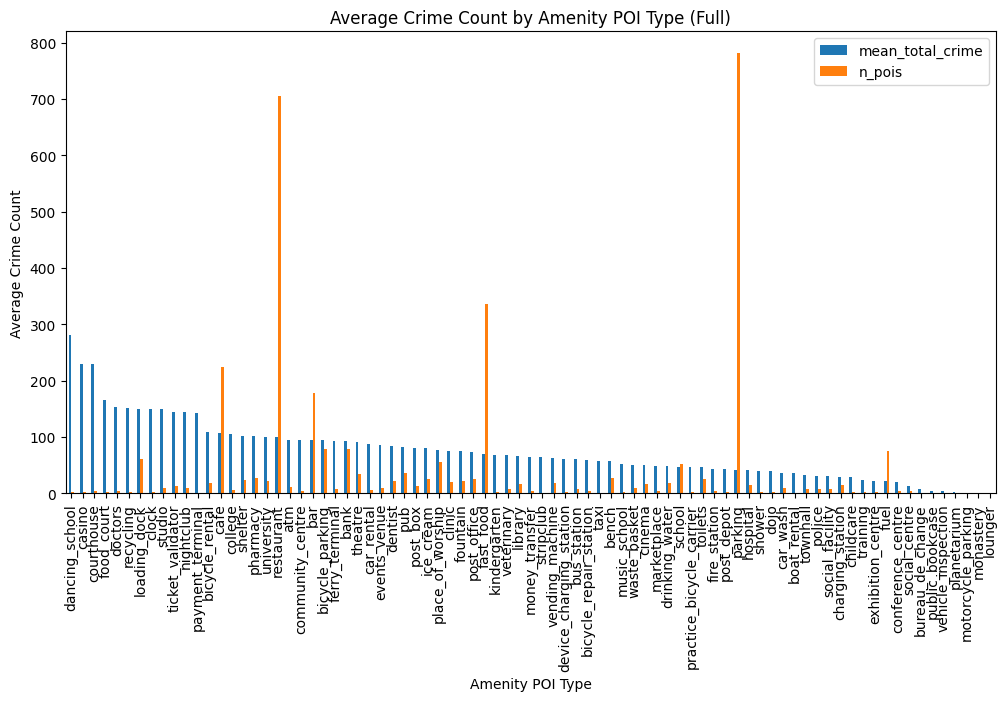

In [24]:
crime_by_amenity_type_full.plot(kind="bar", figsize=(12,6), title="Average Crime Count by Amenity POI Type (Full)")
plt.ylabel("Average Crime Count")
plt.xlabel("Amenity POI Type")
plt.show()  

### crime types by poi type

Amenities

In [25]:
amenity_df = df[df["poi_category"] == "amenity"]

In [26]:
amenity_crime_matrix = (
    amenity_df
    .groupby("poi_type")[crime_cols]
    .mean()
)

In [27]:
TOP_K = 60 

top_amenities = (
    amenity_df["poi_type"]
    .value_counts()
    .head(TOP_K)
    .index
)

amenity_crime_matrix_f = amenity_crime_matrix.loc[top_amenities]

In [28]:
amenity_crime_norm = amenity_crime_matrix.div(
    amenity_crime_matrix.sum(axis=1),
    axis=0
)

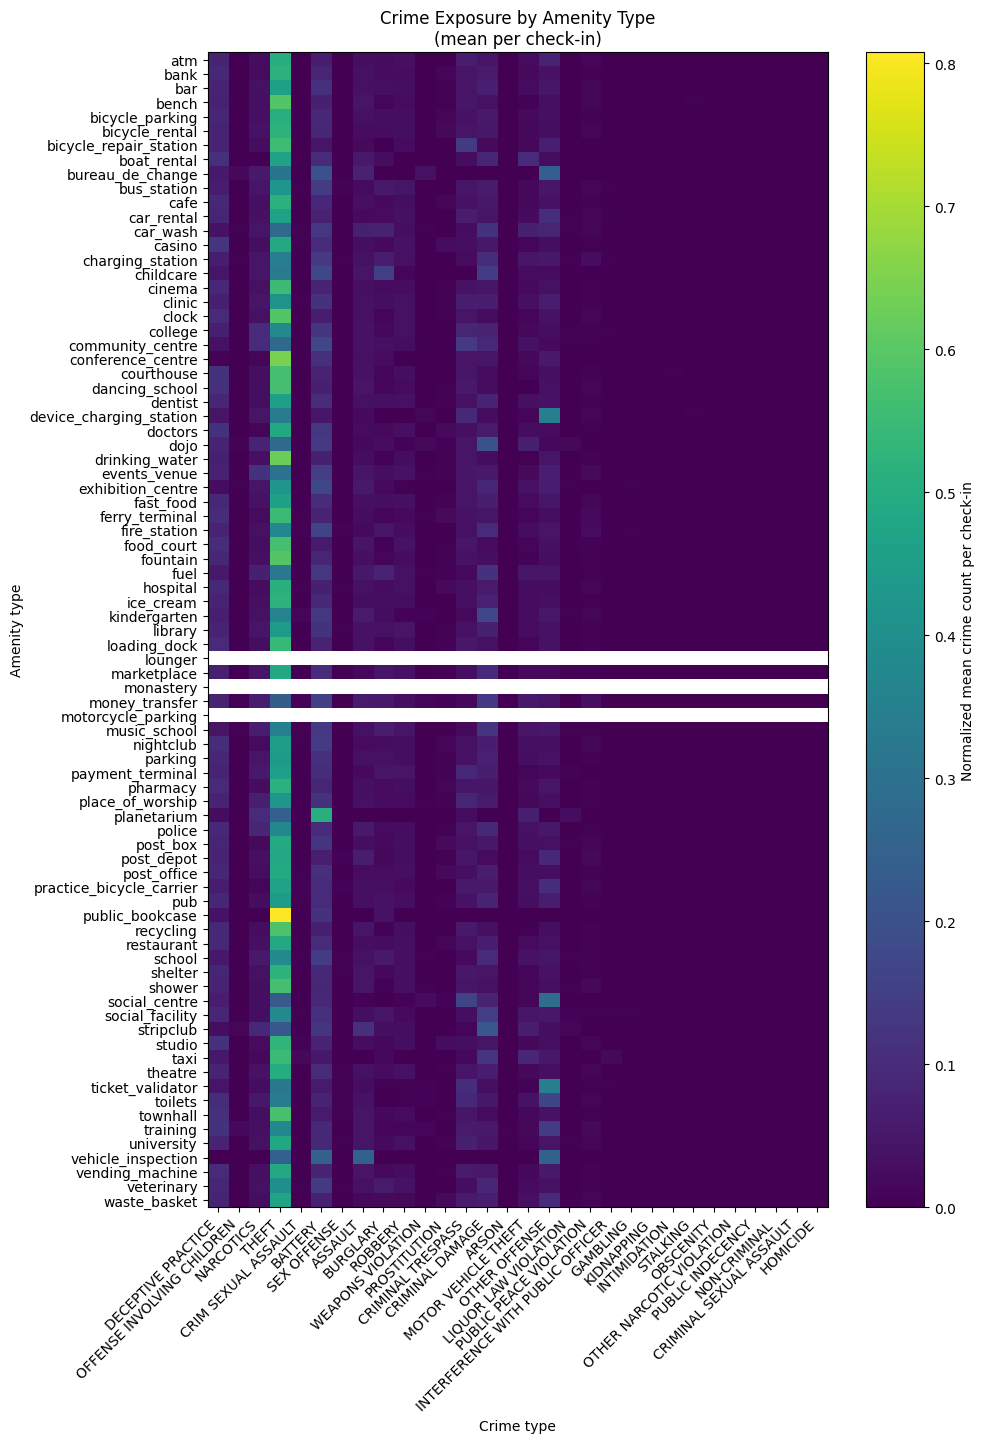

In [29]:
plt.figure(figsize=(10, 15))
im = plt.imshow(amenity_crime_norm.values, aspect="auto")

plt.colorbar(im, label="Normalized mean crime count per check-in")

plt.xticks(
    ticks=np.arange(len(amenity_crime_norm.columns)),
    labels=amenity_crime_norm.columns,
    rotation=45,
    ha="right"
)

plt.yticks(
    ticks=np.arange(len(amenity_crime_norm.index)),
    labels=amenity_crime_norm.index
)

plt.title("Crime Exposure by Amenity Type\n(mean per check-in)")
plt.xlabel("Crime type")
plt.ylabel("Amenity type")

# plt.tight_layout()
plt.show()

Shops

In [30]:
shop_df = df[df["poi_category"] == "shop"]

In [31]:
shop_crime_matrix = (
    shop_df
    .groupby("poi_type")[crime_cols]
    .mean()
)

In [32]:
shop_crime_norm = shop_crime_matrix.div(
    shop_crime_matrix.sum(axis=1),
    axis=0
)

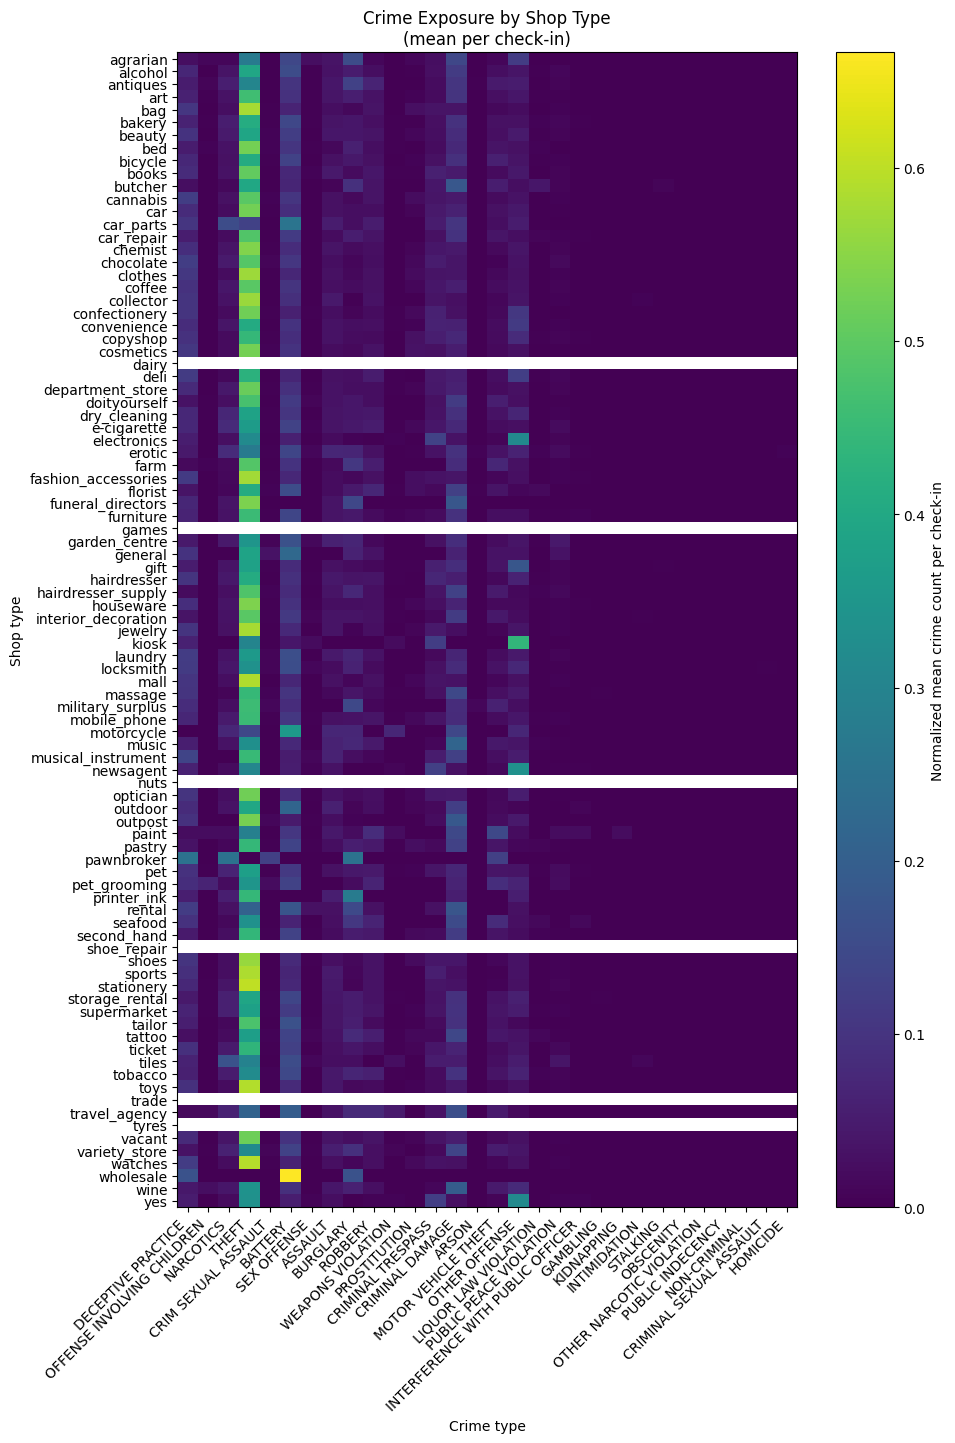

In [33]:
plt.figure(figsize=(10, 15))
im = plt.imshow(shop_crime_norm.values, aspect="auto")

plt.colorbar(im, label="Normalized mean crime count per check-in")

plt.xticks(
    ticks=np.arange(len(shop_crime_norm.columns)),
    labels=shop_crime_norm.columns,
    rotation=45,
    ha="right"
)

plt.yticks(
    ticks=np.arange(len(shop_crime_norm.index)),
    labels=shop_crime_norm.index
)

plt.title("Crime Exposure by Shop Type\n(mean per check-in)")
plt.xlabel("Crime type")
plt.ylabel("Shop type")

# plt.tight_layout()
plt.show()

Tourism

In [34]:
tourism_df = df[df["poi_category"] == "tourism"]

In [35]:
tourism_crime_matrix = (
    tourism_df
    .groupby("poi_type")[crime_cols]
    .mean()
)

In [36]:
tourism_crime_norm = tourism_crime_matrix.div(
    tourism_crime_matrix.sum(axis=1),
    axis=0
)

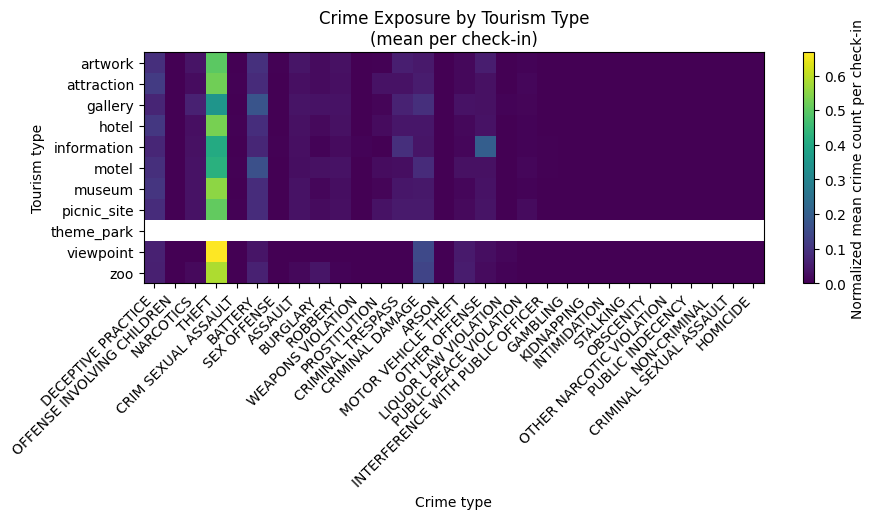

In [37]:
plt.figure(figsize=(10, 3))
im = plt.imshow(tourism_crime_norm.values, aspect="auto")

plt.colorbar(im, label="Normalized mean crime count per check-in")

plt.xticks(
    ticks=np.arange(len(tourism_crime_norm.columns)),
    labels=tourism_crime_norm.columns,
    rotation=45,
    ha="right"
)

plt.yticks(
    ticks=np.arange(len(tourism_crime_norm.index)),
    labels=tourism_crime_norm.index
)

plt.title("Crime Exposure by Tourism Type\n(mean per check-in)")
plt.xlabel("Crime type")
plt.ylabel("Tourism type")

# plt.tight_layout()
plt.show()

Club

In [38]:
club_df = df[df["poi_category"] == "club"]

In [39]:
club_crime_matrix = (
    club_df
    .groupby("poi_type")[crime_cols]
    .mean()
)

In [40]:
club_crime_norm = club_crime_matrix.div(
    club_crime_matrix.sum(axis=1),
    axis=0
)

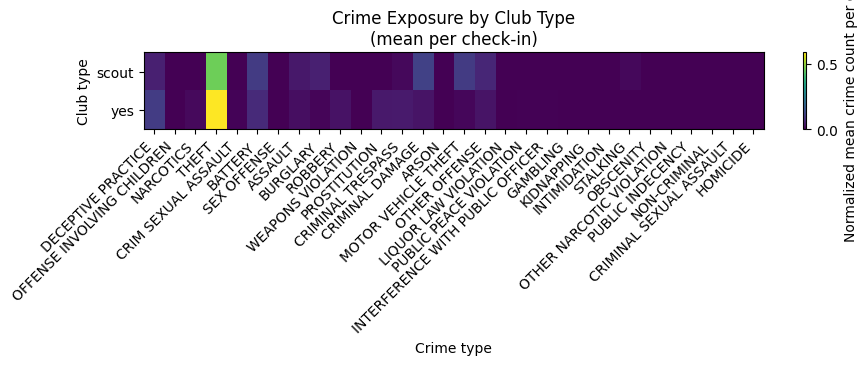

In [41]:
plt.figure(figsize=(10, 1))
im = plt.imshow(club_crime_norm.values, aspect="auto")

plt.colorbar(im, label="Normalized mean crime count per check-in")

plt.xticks(
    ticks=np.arange(len(club_crime_norm.columns)),
    labels=club_crime_norm.columns,
    rotation=45,
    ha="right"
)

plt.yticks(
    ticks=np.arange(len(club_crime_norm.index)),
    labels=club_crime_norm.index
)

plt.title("Crime Exposure by Club Type\n(mean per check-in)")
plt.xlabel("Crime type")
plt.ylabel("Club type")

# plt.tight_layout()
plt.show()

Leisure

In [42]:
leisure_df = df[df["poi_category"] == "leisure"]

In [43]:
leisure_crime_matrix = (
    leisure_df
    .groupby("poi_type")[crime_cols]
    .mean()
)

In [44]:
leisure_crime_norm = leisure_crime_matrix.div(
    leisure_crime_matrix.sum(axis=1),
    axis=0
)

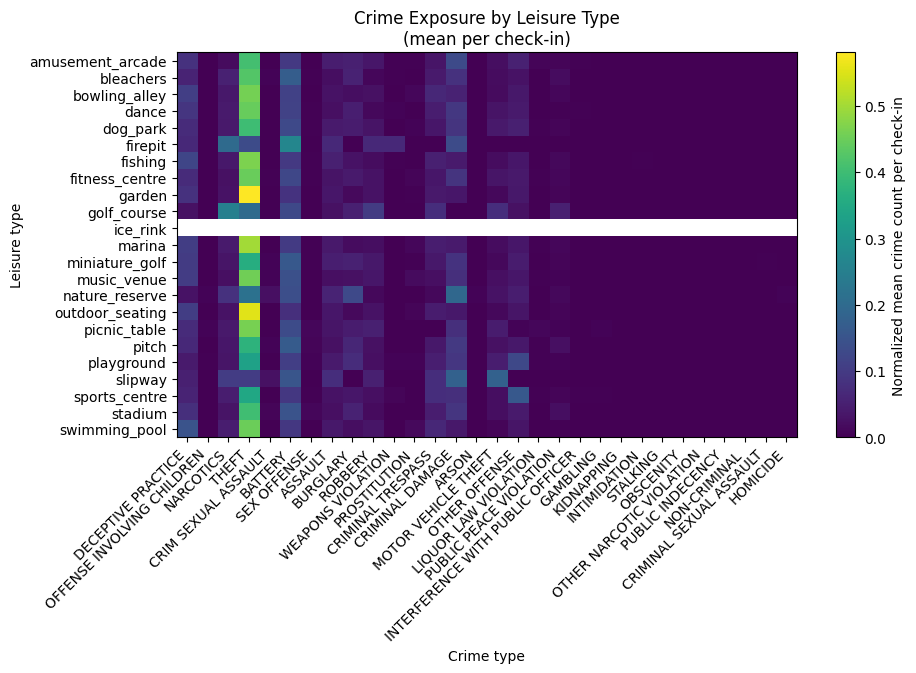

In [105]:
plt.figure(figsize=(10, 5))
im = plt.imshow(leisure_crime_norm.values, aspect="auto")

plt.colorbar(im, label="Normalized mean crime count per check-in")

plt.xticks(
    ticks=np.arange(len(leisure_crime_norm.columns)),
    labels=leisure_crime_norm.columns,
    rotation=45,
    ha="right"
)

plt.yticks(
    ticks=np.arange(len(leisure_crime_norm.index)),
    labels=leisure_crime_norm.index
)

plt.title("Crime Exposure by Leisure Type\n(mean per check-in)")
plt.xlabel("Crime type")
plt.ylabel("Leisure type")

# plt.tight_layout()
plt.show()

correlation between crime types

In [45]:
crime_corr = df[crime_cols].corr()

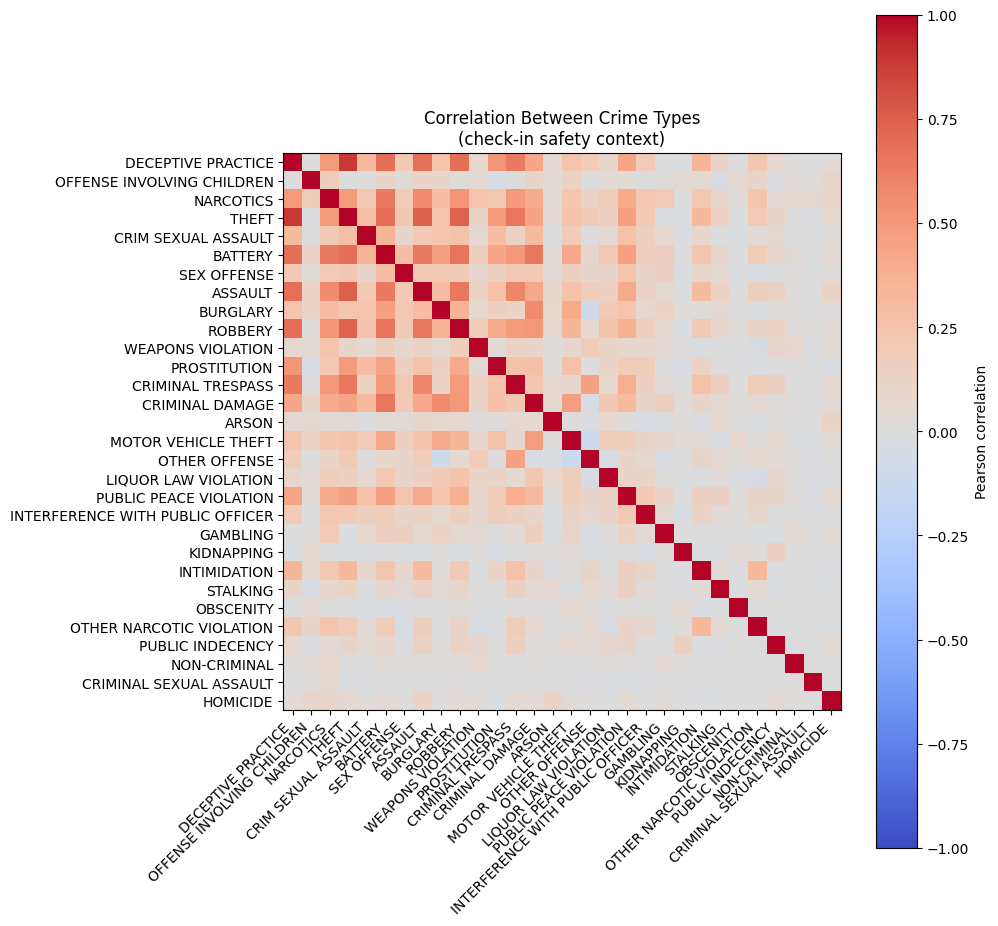

In [46]:
plt.figure(figsize=(10, 10))

im = plt.imshow(
    crime_corr.values,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)

plt.colorbar(im, label="Pearson correlation")

plt.xticks(
    ticks=np.arange(len(crime_corr.columns)),
    labels=crime_corr.columns,
    rotation=45,
    ha="right"
)

plt.yticks(
    ticks=np.arange(len(crime_corr.index)),
    labels=crime_corr.index
)

plt.title("Correlation Between Crime Types\n(check-in safety context)")
plt.tight_layout()
plt.show()

### Check-in Safety Intensity Map

In [53]:
df["log_total_crime"] = np.log1p(df["total_crime"])

In [64]:
MAP_SAMPLE_SIZE = df.shape[0]  # adjust if needed
map_df = df.sample(MAP_SAMPLE_SIZE, random_state=42)

In [65]:
m = folium.Map(
    location=[map_df["latitude"].mean(), map_df["longitude"].mean()],
    zoom_start=11,
    tiles="OpenStreetMap"
)

In [66]:
colormap = linear.YlOrRd_09.scale(
    map_df["log_total_crime"].min(),
    map_df["log_total_crime"].max()
)
colormap.caption = "Log safety exposure"
colormap.add_to(m)

In [67]:
marker_cluster = MarkerCluster().add_to(m)

for _, row in map_df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color=colormap(row["log_total_crime"]),
        fill=True,
        fill_opacity=0.7,
        popup=(
            f"POI type: {row['poi_type']}<br>"
            
            f"POI category: {row['poi_category']}<br>"
            f"Total crime: {row['total_crime']}"
        ),
    ).add_to(marker_cluster)

In [69]:
m.save("map_checkin_safety_all.html")

### POI-level mean safety exposure

In [75]:
poi_map_df = (
    df.groupby(["poi_id", "latitude", "longitude", "poi_category", "poi_type"], dropna=False)
      .agg(
          mean_total_crime=("total_crime", "mean"),
          n_checkins=("user_id", "size"),
      )
      .reset_index()
)

poi_map_df["log_mean_total_crime"] = np.log1p(poi_map_df["mean_total_crime"])

In [ ]:
m2 = folium.Map(
    location=[poi_map_df["latitude"].mean(), poi_map_df["longitude"].mean()],
    zoom_start=11,
    tiles="OpenStreetMap"
)

# Quantile breaks for balanced colors
q = poi_map_df["log_mean_total_crime"].quantile([0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0]).values

colormap = StepColormap(
    colors=["#2ECC71", "#A9DFBF", "#F7DC6F", "#F5B041", "#EB984E", "#E74C3C"],
    index=q,
    vmin=q[0],
    vmax=q[-1],
    caption="Mean safety exposure per POI (quantiles, log scale)"
)
colormap.add_to(m2)

In [77]:
cluster = MarkerCluster().add_to(m2)

for _, r in poi_map_df.iterrows():
    radius = 2 + min(10, np.sqrt(r["n_checkins"]))  # bounded growth

    folium.CircleMarker(
        location=[r["latitude"], r["longitude"]],
        radius=radius,
        color=colormap(r["log_mean_total_crime"]),
        fill=True,
        fill_opacity=0.7,
        popup=(
            f"POI type: {r['poi_type']}<br>"
            f"Category: {r['poi_category']}<br>"
            f"Check-ins: {int(r['n_checkins'])}<br>"
            f"Mean total crime: {r['mean_total_crime']:.2f}"
        ),
    ).add_to(cluster)

In [79]:
m2.save("map_poi_mean_safety.html")

---